In [2]:
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn
%matplotlib inline

#for linux use this
#RUTA_DATOS = '../datos_navent_fiuba/'
#and for windows use this
#RUTA_DATOS = 'Desktop/facu/actual/Orga_de_datos/datos_navent_fiuba/'
# and for lucho use this
RUTA_DATOS = '~/orga-datos/datos_navent_fiuba/'

In [3]:
#se cargan los datos
postulantes_educacion = pd.read_csv(RUTA_DATOS + 'fiuba_1_postulantes_educacion.csv')
pos_gen_edad = pd.read_csv(RUTA_DATOS + 'fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv(RUTA_DATOS + 'fiuba_3_vistas.csv')
postulaciones = pd.read_csv(RUTA_DATOS + 'fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv(RUTA_DATOS + 'fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv(RUTA_DATOS + 'fiuba_6_avisos_detalle.csv')


### Visualizacion inicial de los dataframes
Se procede a ver cada uno de los dataframes cargados junto con alguna de sus caracteriticas para analisar cual es la información que disponemos como punto de partida.

#### Postulantes_educacion

In [4]:
postulantes_educacion.head(5)

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


Podemos observar que tenemos ids de los postulantes y el nombre y el estado de su respectivo nivel educativo.

In [5]:
postulantes_educacion.shape

(298231, 3)

In [6]:
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


In [7]:
postulantes_educacion['nombre'].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nombre, dtype: int64

In [8]:
postulantes_educacion['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

In [9]:
#se observa que nombre y estado son valores categoricos

postulantes_educacion['estado'] = postulantes_educacion['estado'].astype('category')
postulantes_educacion['nombre'] = postulantes_educacion['nombre'].astype('category')

In [10]:
pd.crosstab(postulantes_educacion.nombre, postulantes_educacion.estado)

estado,Abandonado,En Curso,Graduado
nombre,,,
Doctorado,15,94,105
Master,144,1519,1935
Otro,947,4919,18882
Posgrado,317,2239,4831
Secundario,3156,3995,103105
Terciario/Técnico,5692,15032,27009
Universitario,14955,50733,38607


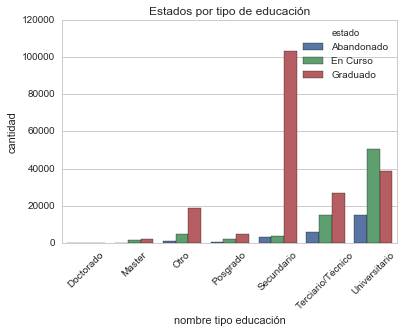

In [11]:
g = sns.countplot(x= 'nombre', hue= 'estado', data = postulantes_educacion)
g.set_title('Estados por tipo de educación')
g.set_xlabel('nombre tipo educación')
g.set_ylabel('cantidad')
g.set_xticklabels(g.get_xticklabels(), rotation = 45)

#### Postulantes_gen_y_edad

In [12]:
pos_gen_edad.head(5)

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


Podemos observar que tenemos ids de los postulantes, su fecha de nacimiento y su respectivo genero.

In [13]:
pos_gen_edad.shape

(200888, 3)

Podemos observar que la cantidad de postulantes sobre la que se tiene esta información (200888) es menor a la que se tiene el nivel educativo (298231).

In [14]:
pos_gen_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [15]:
pos_gen_edad['fechanacimiento'].head()
#observamos el formato en el que se encuentran las fechas.

0    1970-12-03
1    1962-12-04
2    1978-08-10
3    1969-05-09
4    1981-02-16
Name: fechanacimiento, dtype: object

In [16]:
pos_gen_edad = pos_gen_edad[~(pos_gen_edad['fechanacimiento'].isnull())]

In [17]:
pos_gen_edad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196138 entries, 0 to 200886
Data columns (total 3 columns):
idpostulante       196138 non-null object
fechanacimiento    196138 non-null object
sexo               196138 non-null object
dtypes: object(3)
memory usage: 6.0+ MB


Existen postulantes sobre los que no tenemos información de su edad

In [18]:
#se observa que sexo son valores categoricos y fechanacimiento fechas

pos_gen_edad['fechanacimiento'] = pd.to_datetime(pos_gen_edad['fechanacimiento'], errors = 'coerce', format= '%Y-%m-%d')
pos_gen_edad['sexo'] = pos_gen_edad['sexo'].astype('category')

In [19]:
pos_gen_edad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196138 entries, 0 to 200886
Data columns (total 3 columns):
idpostulante       196138 non-null object
fechanacimiento    196131 non-null datetime64[ns]
sexo               196138 non-null category
dtypes: category(1), datetime64[ns](1), object(1)
memory usage: 4.7+ MB


Vemos que existian 7 datos (196138-196131) que tenian fechas de nacimiento en formato incorrecto.

In [20]:
pos_gen_edad = pos_gen_edad[~(pos_gen_edad['fechanacimiento'].isnull())]

In [21]:
pos_gen_edad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196131 entries, 0 to 200886
Data columns (total 3 columns):
idpostulante       196131 non-null object
fechanacimiento    196131 non-null datetime64[ns]
sexo               196131 non-null category
dtypes: category(1), datetime64[ns](1), object(1)
memory usage: 4.7+ MB


In [22]:
pos_gen_edad['sexo'].value_counts()

FEM           101674
MASC           94013
NO_DECLARA       444
Name: sexo, dtype: int64

La cantidad de datos acerca de hombres y mujeres que poseemos es aproximadamente la misma.

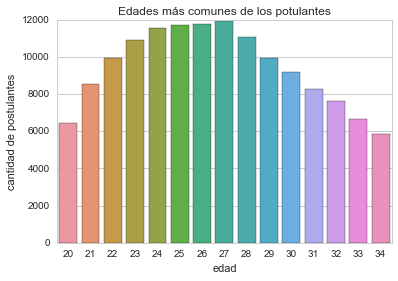

In [23]:
edades = (2018- pos_gen_edad['fechanacimiento'].dt.year).value_counts()[:15]
g = sns.barplot(x= edades.index, y=edades.values, orient= 'v')
g.set_title('Edades más comunes de los potulantes')
g.set_xlabel('edad')
g.set_ylabel('cantidad de postulantes')

#### Vistas

In [24]:
vistas.tail(5)

,idAviso,timestamp,idpostulante
961892,1112366944,2018-02-28T23:59:08.772-0500,MVPj3AK
961893,1001442844,2018-02-28T23:59:37.000-0500,VNrYP6m
961894,1112362644,2018-02-28T23:59:46.181-0500,owzLD43
961895,1112305277,2018-02-28T23:59:52.754-0500,A3DraY1
961896,1112345900,2018-02-28T23:59:55.409-0500,ekmNzBW


Aquí encontramos las vistas que tuvo un aviso idAviso por el postulante idpostulante

In [25]:
vistas.shape

(961897, 3)

In [26]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


In [27]:
vistas['timestamp'] = pd.to_datetime(vistas['timestamp'], errors = 'coerce', format = "%Y-%m-%dT%H:%M:%S.%f-0500")

In [28]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null datetime64[ns]
idpostulante    961897 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.0+ MB


In [29]:
vistas.tail()

,idAviso,timestamp,idpostulante
961892,1112366944,2018-02-28 23:59:08.772,MVPj3AK
961893,1001442844,2018-02-28 23:59:37.000,VNrYP6m
961894,1112362644,2018-02-28 23:59:46.181,owzLD43
961895,1112305277,2018-02-28 23:59:52.754,A3DraY1
961896,1112345900,2018-02-28 23:59:55.409,ekmNzBW


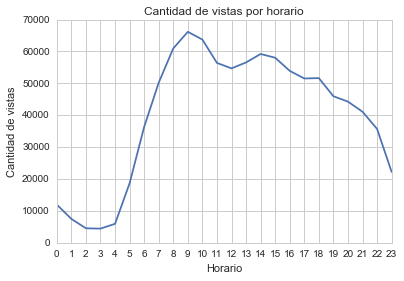

In [30]:
horarios = vistas['timestamp'].dt.hour.value_counts().sort_index()
g = horarios.plot(xticks= range(0,24))
g.set_title('Cantidad de vistas por horario')
g.set_xlabel('Horario')
g.set_ylabel('Cantidad de vistas')

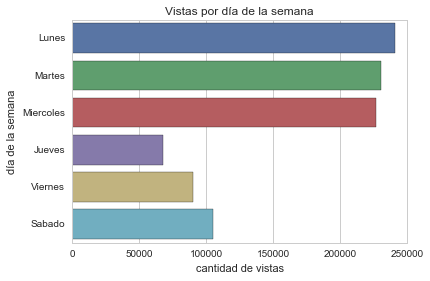

In [31]:
weekdays = vistas['timestamp'].map(lambda x: x.weekday()).value_counts()
g = sns.barplot(x= weekdays.values, y= weekdays.index, orient ='h')
g.set_title('Vistas por día de la semana')
g.set_xlabel('cantidad de vistas')
g.set_ylabel('día de la semana')
g.set_yticklabels(('Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado','Domingo'))

#### Postulaciones

In [32]:
postulaciones.head(5)

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [33]:
postulaciones.shape

(3401623, 3)

In [34]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB


In [35]:
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'],errors = 'coerce', format = "%Y-%m-%d %H:%M:%S")

In [36]:
#promedio de postulaciones por usuario
postulantes = postulaciones['idpostulante'].value_counts()
postulantes.describe()

count    200888.000000
mean         16.932933
std          31.267385
min           1.000000
25%           3.000000
50%           8.000000
75%          19.000000
max        3166.000000
Name: idpostulante, dtype: float64

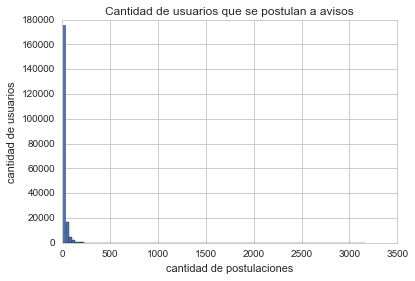

In [37]:
g = postulantes.hist(bins=100)
g.set_title('Cantidad de usuarios que se postulan a avisos')
g.set_xlabel('cantidad de postulaciones')
g.set_ylabel('cantidad de usuarios')

Filtramos porque como vemos muy pocos usuarios se han postulado a muchisimos avisos.

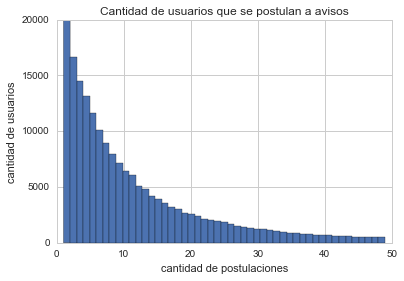

In [38]:
postulantes_filt = postulantes[postulantes.values < 50]
g = postulantes_filt.hist(bins=49)
g.set_title('Cantidad de usuarios que se postulan a avisos')
g.set_xlabel('cantidad de postulaciones')
g.set_ylabel('cantidad de usuarios')

In [39]:
pos_por_aviso = postulaciones['idaviso'].value_counts()
pos_por_aviso.describe()

count    12692.000000
mean       268.013158
std        542.269598
min          1.000000
25%         33.000000
50%        100.000000
75%        269.250000
max       9932.000000
Name: idaviso, dtype: float64

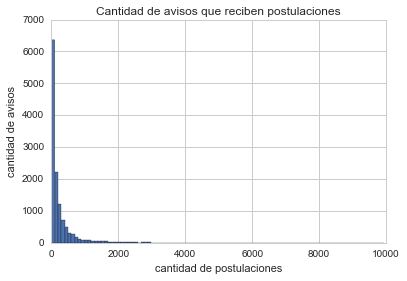

In [40]:
g = pos_por_aviso.hist(bins=100)
g.set_title('Cantidad de avisos que reciben postulaciones')
g.set_xlabel('cantidad de postulaciones')
g.set_ylabel('cantidad de avisos')

De igual manera, muy poca cantidad de avisos reciben varios miles de postulaciones más que el resto.

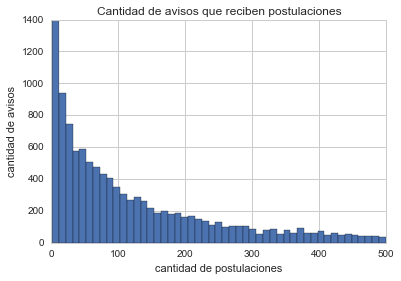

In [41]:
pos_por_aviso_filt = pos_por_aviso[pos_por_aviso.values < 500]
g = pos_por_aviso_filt.hist(bins=49)
g.set_title('Cantidad de avisos que reciben postulaciones')
g.set_xlabel('cantidad de postulaciones')
g.set_ylabel('cantidad de avisos')

In [42]:
postulaciones['fechapostulacion'].dt.month.value_counts()

2    2125425
1    1276198
Name: fechapostulacion, dtype: int64

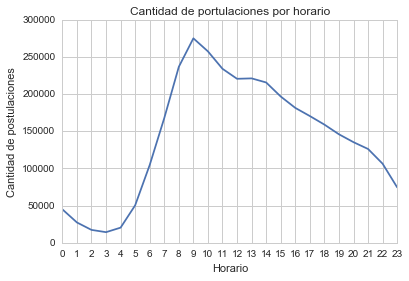

In [43]:
horarios = postulaciones['fechapostulacion'].dt.hour.value_counts().sort_index()
g = horarios.plot(xticks= range(0,24))
g.set_title('Cantidad de portulaciones por horario')
g.set_xlabel('Horario')
g.set_ylabel('Cantidad de postulaciones')

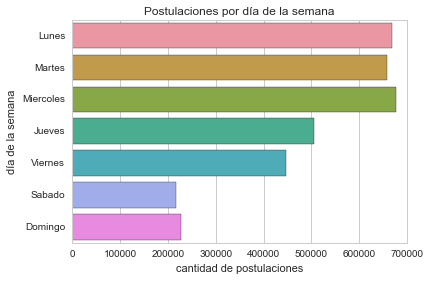

In [44]:
weekdays = postulaciones['fechapostulacion'].map(lambda x: x.weekday())
weekdays_count = weekdays.value_counts()
g = sns.barplot(x= weekdays_count.values, y= weekdays_count.index, orient ='h')
g.set_title('Postulaciones por día de la semana')
g.set_xlabel('cantidad de postulaciones')
g.set_ylabel('día de la semana')
g.set_yticklabels(('Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado','Domingo'))

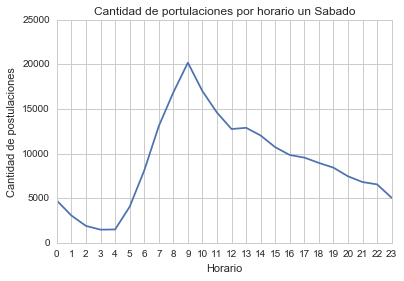

In [45]:
sabados = (weekdays.values == 5)
horarios_sabados = (postulaciones[sabados])['fechapostulacion'].dt.hour.value_counts().sort_index()
g = horarios_sabados.plot(xticks= range(0,24))
g.set_title('Cantidad de portulaciones por horario un Sabado')
g.set_xlabel('Horario')
g.set_ylabel('Cantidad de postulaciones')

Como vemos, un día como un sabado responde al mismo patron de postulaciones por horario que el resto de los dias.

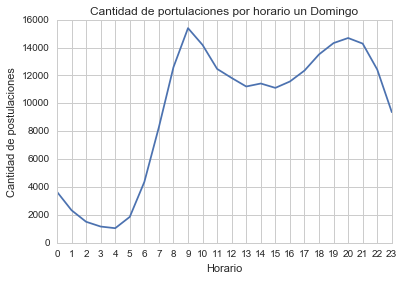

In [46]:
domingos = (weekdays.values == 6)
horarios_domingos = (postulaciones[domingos])['fechapostulacion'].dt.hour.value_counts().sort_index()
g = horarios_domingos.plot(xticks= range(0,24))
g.set_title('Cantidad de portulaciones por horario un Domingo')
g.set_xlabel('Horario')
g.set_ylabel('Cantidad de postulaciones')

In [47]:
lunes = (weekdays.values == 0)
martes = (weekdays.values == 1)
miercoles = (weekdays.values == 2)
jueves = (weekdays.values == 3)
viernes = (weekdays.values == 4)
sabados = (weekdays.values == 5)
domingos = (weekdays.values == 6)

# Versión con detalle de todas las horas
horarios_lunes = (postulaciones[lunes])['fechapostulacion'].dt.hour.value_counts().sort_index()
horarios_martes = (postulaciones[martes])['fechapostulacion'].dt.hour.value_counts().sort_index()
horarios_miercoles = (postulaciones[miercoles])['fechapostulacion'].dt.hour.value_counts().sort_index()
horarios_jueves = (postulaciones[jueves])['fechapostulacion'].dt.hour.value_counts().sort_index()
horarios_viernes = (postulaciones[viernes])['fechapostulacion'].dt.hour.value_counts().sort_index()
horarios_sabados = (postulaciones[sabados])['fechapostulacion'].dt.hour.value_counts().sort_index()
horarios_domingos = (postulaciones[domingos])['fechapostulacion'].dt.hour.value_counts().sort_index()

# Versión con detalle por franjas horarias
'''
postulaciones['rangohorario'] = pd.cut(postulaciones['fechapostulacion'].dt.hour, range(0, 25, 3), right=False, labels=['{} - {}'.format(i, i + 3) for i in range(0, 24, 3)])
horarios_lunes = (postulaciones[lunes])['rangohorario'].value_counts().sort_index()
horarios_martes = (postulaciones[martes])['rangohorario'].value_counts().sort_index()
horarios_miercoles = (postulaciones[miercoles])['rangohorario'].value_counts().sort_index()
horarios_jueves = (postulaciones[jueves])['rangohorario'].value_counts().sort_index()
horarios_viernes = (postulaciones[viernes])['rangohorario'].value_counts().sort_index()
horarios_sabados = (postulaciones[sabados])['rangohorario'].value_counts().sort_index()
horarios_domingos = (postulaciones[domingos])['rangohorario'].value_counts().sort_index()
'''

dias_vs_horarios = {'lunes': horarios_lunes, 'martes': horarios_martes, 'miercoles': horarios_miercoles,\
                   'jueves': horarios_jueves, 'viernes': horarios_viernes,'sabados': horarios_sabados,\
                   'domingos': horarios_domingos}
dias_vs_horas = pd.DataFrame(data = dias_vs_horarios)
dias_vs_horas = dias_vs_horas[['lunes','martes','miercoles','jueves','viernes','sabados','domingos']]
dias_vs_horas
#dias = [lunes,martes,miercoles,jueves,viernes,sabados,domingos]
#horarios = [len(horarios_lunes,horarios_martes,horarios_miercoles,horarios_jueves,horarios_viernes,horarios_sabados,horarios_domingos]

#tabla = pd.crosstab(dias,horarios)
#print(tabla)

,lunes,martes,miercoles,jueves,viernes,sabados,domingos
0,7217,8469,8400,6846,5668,4727,3654
1,4255,4869,5219,4086,3531,3050,2332
2,2935,3103,3199,2576,2128,1888,1507
3,2325,2664,2736,1949,1979,1472,1165
4,3372,4236,4275,3433,2523,1496,1047
5,8091,10057,10064,8878,7392,4035,1858
6,18422,20423,20036,17196,16040,8091,4361
7,29800,32190,32008,27301,25008,13064,8290
8,45282,45650,46705,36681,32801,16843,12585
9,53767,54208,52636,40422,38230,20176,15388


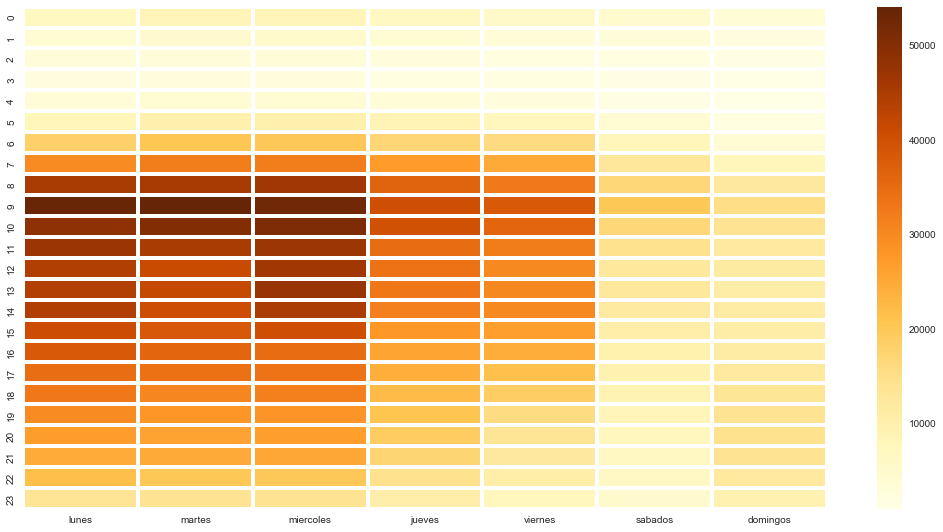

In [48]:
plt.figure(figsize = (18,9))
ax = sns.heatmap(dias_vs_horas,linewidth = 3,cmap="YlOrBr")

Mientras que los domingos tienen un patrón distinto, esperable si consideramos que el estilo de vida de gente varia drasticamente estos dias.

#### avisos_online

In [49]:
avisos_online.head(5)

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [50]:
avisos_online.shape

(5028, 1)

Aquí podemos ver los avisos online al 8 de marzo de 2018

#### avisos_detalle

In [51]:
avisos_detalle.head(5)

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [52]:
avisos_detalle.shape

(13534, 11)

In [53]:
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [54]:
# Columnas que se detecto que son variables categoricas
avisos_detalle['nombre_zona'] = avisos_detalle['nombre_zona'].astype('category')
avisos_detalle['tipo_de_trabajo'] = avisos_detalle['tipo_de_trabajo'].astype('category')
avisos_detalle['nivel_laboral'] = avisos_detalle['nivel_laboral'].astype('category')
avisos_detalle['nombre_area'] = avisos_detalle['nombre_area'].astype('category')                                                                             

In [55]:
postulaciones_area = pd.merge(postulaciones, pd.DataFrame(avisos_detalle[['idaviso', 'nombre_area', 'nivel_laboral', 'tipo_de_trabajo']]), on='idaviso', how='left')

In [56]:
postulaciones_area.head()

,idaviso,idpostulante,fechapostulacion,nombre_area,nivel_laboral,tipo_de_trabajo
0,1112257047,NM5M,2018-01-15 16:22:34,Atención al Cliente,Otro,Part-time
1,1111920714,NM5M,2018-02-06 09:04:50,Telemarketing,Senior / Semi-Senior,Part-time
2,1112346945,NM5M,2018-02-22 09:04:47,Telemarketing,Senior / Semi-Senior,Full-time
3,1112345547,NM5M,2018-02-22 09:04:59,Telemarketing,Senior / Semi-Senior,Full-time
4,1112237522,5awk,2018-01-25 18:55:03,Contabilidad,Senior / Semi-Senior,Full-time


### Postulaciones a avisos que están en línea

In [57]:
postulaciones_area_online = pd.merge(postulaciones_area, avisos_online, on='idaviso', how='inner')

In [85]:
postulaciones_area_online.head()

,idaviso,idpostulante,fechapostulacion,nombre_area,nivel_laboral,tipo_de_trabajo
0,1112346945,NM5M,2018-02-22 09:04:47,Telemarketing,Senior / Semi-Senior,Full-time
1,1112346945,EeEaXo,2018-02-19 21:58:42,Telemarketing,Senior / Semi-Senior,Full-time
2,1112346945,ZR0rWY,2018-02-20 09:38:14,Telemarketing,Senior / Semi-Senior,Full-time
3,1112346945,6OWl1v,2018-02-27 22:59:31,Telemarketing,Senior / Semi-Senior,Full-time
4,1112346945,E2Y16b,2018-02-20 05:27:05,Telemarketing,Senior / Semi-Senior,Full-time


In [91]:
postulaciones_area_online = pd.merge(postulaciones_area_online, pos_gen_edad, on='idpostulante', how='left')

In [92]:
postulaciones_area_online.head()

,idaviso,idpostulante,fechapostulacion,nombre_area,nivel_laboral,tipo_de_trabajo,fechanacimiento,sexo
0,1112346945,NM5M,2018-02-22 09:04:47,Telemarketing,Senior / Semi-Senior,Full-time,1970-12-03,FEM
1,1112346945,EeEaXo,2018-02-19 21:58:42,Telemarketing,Senior / Semi-Senior,Full-time,1984-03-23,FEM
2,1112346945,ZR0rWY,2018-02-20 09:38:14,Telemarketing,Senior / Semi-Senior,Full-time,1989-04-04,MASC
3,1112346945,6OWl1v,2018-02-27 22:59:31,Telemarketing,Senior / Semi-Senior,Full-time,1971-10-23,FEM
4,1112346945,E2Y16b,2018-02-20 05:27:05,Telemarketing,Senior / Semi-Senior,Full-time,1967-03-18,FEM


In [94]:
postulaciones_area_online['nombre_area'].value_counts()

Ventas                               173051
Administración                       120008
Producción                           111104
Comercial                             94609
Atención al Cliente                   76103
Call Center                           57731
Recepcionista                         48999
Tesorería                             34890
Telemarketing                         34218
Contabilidad                          22461
Recursos Humanos                      21669
Mantenimiento y Limpieza              20818
Almacén / Depósito / Expedición       20659
Créditos y Cobranzas                  20286
Farmacéutica                          17106
Gastronomia                           14961
Camareros                             13499
Administración de Personal            13023
Secretaria                            12888
Logística                             12080
Marketing                             11822
Legal                                 11488
Mantenimiento                   

### Sexo de los postulantes según área

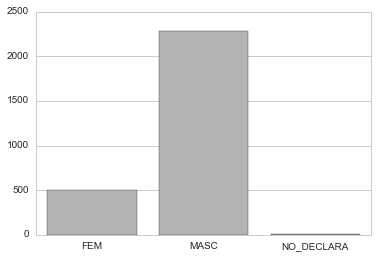

In [93]:
plot_data = postulaciones_area_online.loc[postulaciones_area_online['nombre_area'] == 'Programación']['sexo'].value_counts()
sns.barplot(y=plot_data.values, x=plot_data.index, color=(0.7, 0.7, 0.7))

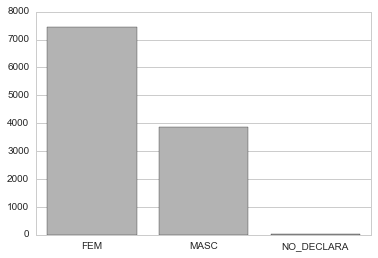

In [98]:
plot_data = postulaciones_area_online.loc[postulaciones_area_online['nombre_area'] == 'Salud']['sexo'].value_counts()
sns.barplot(y=plot_data.values, x=plot_data.index, color=(0.7, 0.7, 0.7))

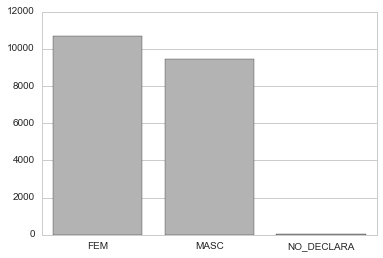

In [101]:
plot_data = postulaciones_area_online.loc[postulaciones_area_online['nombre_area'] == 'Mantenimiento y Limpieza']['sexo'].value_counts()
sns.barplot(y=plot_data.values, x=plot_data.index, color=(0.7, 0.7, 0.7))

In [152]:
postulaciones_area_online['edad'] = 2018 - postulaciones_area_online['fechanacimiento'].dt.year
postulaciones_area_online['rangoetario'] = pd.cut(postulaciones_area_online['edad'], range(15, 71, 5), right=False, labels=['{} - {}'.format(i, i + 4) for i in range(15, 70, 5)])

postulaciones_area_online.head()

,idaviso,idpostulante,fechapostulacion,nombre_area,nivel_laboral,tipo_de_trabajo,fechanacimiento,sexo,edad,rangoetario
0,1112346945,NM5M,2018-02-22 09:04:47,Telemarketing,Senior / Semi-Senior,Full-time,1970-12-03,FEM,48.0,45 - 49
1,1112346945,EeEaXo,2018-02-19 21:58:42,Telemarketing,Senior / Semi-Senior,Full-time,1984-03-23,FEM,34.0,30 - 34
2,1112346945,ZR0rWY,2018-02-20 09:38:14,Telemarketing,Senior / Semi-Senior,Full-time,1989-04-04,MASC,29.0,25 - 29
3,1112346945,6OWl1v,2018-02-27 22:59:31,Telemarketing,Senior / Semi-Senior,Full-time,1971-10-23,FEM,47.0,45 - 49
4,1112346945,E2Y16b,2018-02-20 05:27:05,Telemarketing,Senior / Semi-Senior,Full-time,1967-03-18,FEM,51.0,50 - 54


### Edad de los postulantes según área

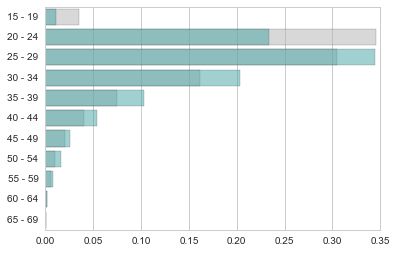

In [161]:
plot_data = postulaciones_area_online.loc[postulaciones_area_online['nombre_area'] == 'Ventas']['rangoetario'].value_counts(normalize=True)
g = sns.barplot(x=plot_data.values, y=plot_data.index, color=(0.7, 0.7, 0.7), orient='h', alpha=0.5)
plot_data = postulaciones_area_online.loc[postulaciones_area_online['nombre_area'] == 'Administración']['rangoetario'].value_counts(normalize=True)
g = sns.barplot(x=plot_data.values, y=plot_data.index, color=(0.2, 0.7, 0.7), orient='h', alpha=0.5)